In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

first we will create some random data for ourselves

In [9]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10) 
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(x_data)
print("\n")
print(y_label)

[-1.42697804  2.42242055  1.40763316  4.61750301  4.03006379  4.30708447
  7.44217395  6.47368311  9.06368696  9.46535285]


[ 0.05867233  2.58431517  3.04295953  2.84743889  5.89456036  5.93176543
  7.76358089  7.73049036  8.15250009 10.99325534]


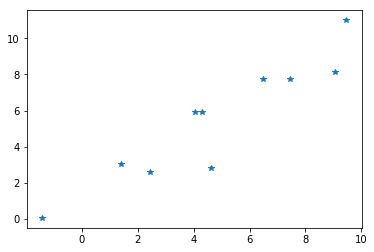

In [11]:
plt.plot(x_data,y_label,'*')

now randomly initialise some value to the "m" and "b" to the equation y = m*x+b

In [12]:
np.random.rand(2)
m = tf.Variable(0.29)
b = tf.Variable(0.77)
init = tf.global_variables_initializer()

now we will plot the initial graph using the initialized "m" and "b" values

In [13]:
with tf.Session() as sess: #inside the session block
    sess.run(init) #initialize the variables
    y_preds = []
    for x,y in zip(x_data,y_label):
        y_pred = m*x + b
        y_pred = y_pred.eval()#converting back to numpy arrays
        y_preds.append(y_pred)

Text(0.5, 1.0, 'the blue line represents the curve which needs to get fitted')

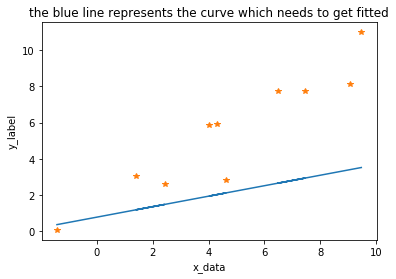

In [14]:
plt.plot(x_data,y_preds)
plt.plot(x_data,y_label,'*')
plt.xlabel("x_data")
plt.ylabel("y_label")
plt.title("the blue line represents the curve which needs to get fitted")

so for fitting the curve we will train the model i.e Y=mx+b 

# Forward Propagation

In [182]:
error = 0
#here "y" is the actual prediction(given) and "y_hat" is the final prediction
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    #we will calculate the mean square error for the equation
    error = error + (y - y_hat)**2

# Adding optimizer and then Backpropagation starts

In [183]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

# Now the actual tensorflow execution starts with sessions

In [184]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        
    # now after running the model we get the adjusted weights of "m" and "b"
    final_m,final_b = sess.run([m,b])

# Now we have adjusted the weights lets plot the graph

In [185]:
with tf.Session() as sess:
    sess.run(init)
    
    for x,y in zip(x_data,y_label):
        y_pred = final_m*x_data + final_b
        
        #y_pre = y_pre.eval()

Text(0.5, 1.0, 'the blue line represents the curve which needs to get fitted')

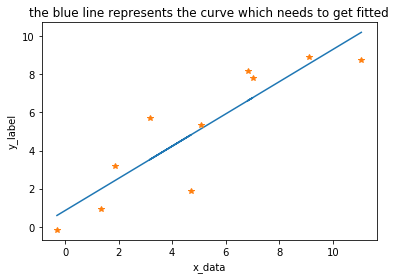

In [186]:
plt.plot(x_data,y_pred)
plt.plot(x_data,y_label,'*')
plt.xlabel("x_data")
plt.ylabel("y_label")
plt.title("the blue line represents the curve which needs to get fitted")

# Testing on the test data

In [187]:
x_data = np.linspace(10,20,10) + np.random.uniform(-1.5,1.5,10) 
y_label = np.linspace(10,20,10) + np.random.uniform(-1.5,1.5,10)

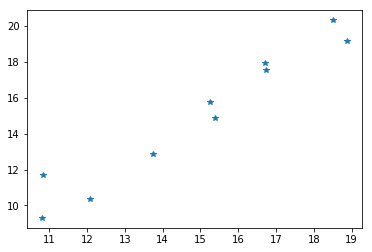

In [188]:
plt.plot(x_data,y_label,'*')

In [189]:
with tf.Session() as sess:
    sess.run(init)
    
    for x,y in zip(x_data,y_label):
        y_pred = final_m*x_data + final_b

Text(0.5, 1.0, 'the blue line represents the curve which needs to get fitted')

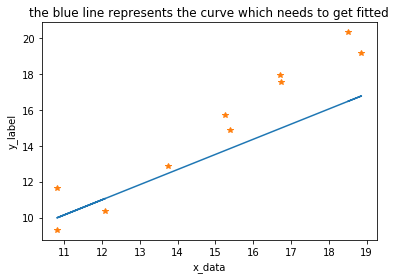

In [190]:
plt.plot(x_data,y_pred)
plt.plot(x_data,y_label,'*')
plt.xlabel("x_data")
plt.ylabel("y_label")
plt.title("the blue line represents the curve which needs to get fitted")

# THANK YOU